# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Оглавление:

1. [Загрузка и подготовка данных](#chapter1)<br>
2. [Обучение и проверка модели](#chapter2)<br>
2.1 [Обучение первой модели](#chapter2.1)<br>
2.2 [Обучение второй модели](#chapter2.2)<br>
2.3 [Обучение третьей модели](#chapter2.3)<br>
2.4 [Выводы по обучению моделей](#chapter2.4)<br>
3. [Подготовка к расчету прибыли](#chapter3)<br>
4. [Расчет прибыли и рисков](#chapter4)<br>

# 1. Загрузка и подготовка данных
<a class="anchor" id="chapter1"></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.metrics import (accuracy_score,
                             r2_score,
                             mean_absolute_error,
                             mean_squared_error
)

from sklearn.linear_model import LinearRegression, LogisticRegression

In [6]:
df_1 = pd.read_csv('datasets/geo_data_0.csv')
df_2 = pd.read_csv('datasets/geo_data_1.csv')
df_3 = pd.read_csv('datasets/geo_data_2.csv')

In [7]:
df_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


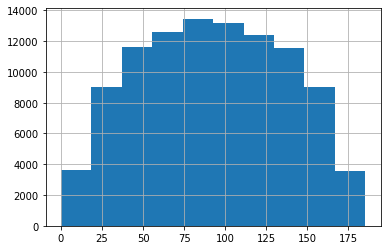

In [10]:
df_1['product'].hist()

In [11]:
df_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


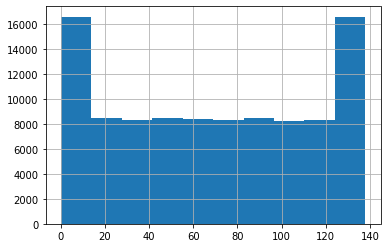

In [14]:
df_2['product'].hist()

In [15]:
df_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [16]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [17]:
df_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


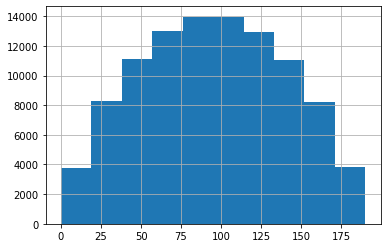

In [18]:
df_3['product'].hist()

Мы не видим категориальных признаков и кодировка не требуется, поделим данные на тренировочную и валидационную выборки, сделаем масштабирование данных, для каждого дата сета по отдельности.

Для 1 модели

In [19]:
target = df_1['product']
features = df_1.drop(['id','product'], axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

# сохраним в новые объекты наши признаки
features_train_1 = features_train.copy()
features_valid_1 = features_valid.copy()
target_train_1 = target_train.copy()
target_valid_1 = target_valid.copy()

#сделаем масштабирование числовых признаков
numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()
scaler.fit(features_train_1.loc[:, numeric])
features_train_1.loc[:, numeric] = scaler.transform(features_train_1.loc[:, numeric])
features_valid_1.loc[:, numeric] = scaler.transform(features_valid_1.loc[:, numeric])

Для 2 модели

In [20]:
target = df_2['product']
features = df_2.drop(['id','product'], axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

# сохраним в новые объекты наши признаки
features_train_2 = features_train.copy()
features_valid_2 = features_valid.copy()
target_train_2 = target_train.copy()
target_valid_2 = target_valid.copy()

#сделаем масштабирование числовых признаков
numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()
scaler.fit(features_train_2.loc[:, numeric])
features_train_2.loc[:, numeric] = scaler.transform(features_train_2.loc[:, numeric])
features_valid_2.loc[:, numeric] = scaler.transform(features_valid_2.loc[:, numeric])

Для 3 модели

In [21]:
target = df_3['product']
features = df_3.drop(['id','product'], axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

# сохраним в новые объекты наши признаки
features_train_3 = features_train.copy()
features_valid_3 = features_valid.copy()
target_train_3 = target_train.copy()
target_valid_3 = target_valid.copy()

#сделаем масштабирование числовых признаков
numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()
scaler.fit(features_train_3.loc[:, numeric])
features_train_3.loc[:, numeric] = scaler.transform(features_train_3.loc[:, numeric])
features_valid_3.loc[:, numeric] = scaler.transform(features_valid_3.loc[:, numeric])

Мы имеем 3 датасета с общими признаками:
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек, комментари по ним не даются;

<br>
И целевыми признаками:

- product — объём запасов в скважине (тыс. баррелей).

<br>
Мы видим значительные отличия 2-го датасета от первого и третьего, не имеющего вида нормального распределения и имеющего незначительные отклонения менее 1% на более 90% всего интервала значений.

На этапе обработки:

- Мы убрали из данных не информативные для нас столбцы с номером ID, 
- Поделили данные на тренировочную и валидационную выборки,
- Сделали масштабирование численных признаков.<br>

Данные предобработаны, масштабированы и поделены на выборки. Теперь можно обучать ML модели и исследовать задачу.

# 2. Обучение и проверка модели
<a class="anchor" id="chapter2"></a>

### Обучение первой модели
<a class="anchor" id="chapter2.1"></a>

In [23]:
model = LinearRegression() # инициализируем модель логистической регрессии
model.fit(features_train_1, target_train_1) # обучим модель на тренировочной выборке
predicted_valid_1 = model.predict(features_valid_1) # сделаем предикт для валидационного датасета

target_mean= target_valid_1.mean() # получим средний запас сырья
predicted_mean = predicted_valid_1.mean() # получим средний запас предсказанного сырья
r2 = model.score(features_valid_1, target_valid_1) # получим метрику r2 для модели на валидационном датасете
rmse = mean_squared_error(target_valid_1, predicted_valid_1)**0.5 # получим метрику rmse для модели на валидационном датасете

# сохряняю метрики в глобальные переменные
r2_1 = r2.copy()
rmse_1 = rmse.copy()
target_mean_1 = target_mean
predicted_mean_1 = predicted_mean.copy()

print('R2 на валидационной выборке: ', r2_1) 
print('rmse на валидационной выборке: ', rmse_1)
print('Средний запас сырья: ', target_mean_1)
print('Средний запас предсказанного сырья: ', predicted_mean_1)

R2 на валидационной выборке:  0.27994321524487786
rmse на валидационной выборке:  37.5794217150813
Средний запас сырья:  92.07859674082941
Средний запас предсказанного сырья:  92.59256778438038


In [24]:
pd.Series(predicted_valid_1)

0         95.894952
1         77.572583
2         77.892640
3         90.175134
4         70.510088
            ...    
24995    103.037104
24996     85.403255
24997     61.509833
24998    118.180397
24999    118.169392
Length: 25000, dtype: float64

In [25]:
target_valid_1

71751     10.038645
80493    114.551489
2655     132.603635
53233    169.072125
91141    122.325180
            ...    
12581    170.116726
18456     93.632175
73035    127.352259
63834     99.782700
43558    177.821022
Name: product, Length: 25000, dtype: float64

### Обучение второй модели
<a class="anchor" id="chapter2.2"></a>

In [32]:
model = LinearRegression() # инициализируем модель логистической регрессии
model.fit(features_train_2, target_train_2) # обучим модель на тренировочной выборке
predicted_valid_2 = model.predict(features_valid_2) # сделаем предикт для валидационного датасета

target_mean= target_valid_2.mean() # получим средний запас сырья
predicted_mean = predicted_valid_2.mean() # получим средний запас предсказанного сырья
r2 = model.score(features_valid_2, target_valid_2) # получим метрику r2 для модели на валидационном датасете
rmse = mean_squared_error(target_valid_2, predicted_valid_2)**0.5 # получим метрику rmse для модели на валидационном датасете

# сохряняю метрики в глобальные переменные
r2_2 = r2.copy()
rmse_2 = rmse.copy()
target_mean_2 = target_mean
predicted_mean_2 = predicted_mean.copy()

print('R2 на валидационной выборке: ', r2_2) 
print('rmse на валидационной выборке: ', rmse_2)
print('Средний запас сырья: ', target_mean_2)
print('Средний запас предсказанного сырья: ', predicted_mean_2)

R2 на валидационной выборке:  0.9996233978805126
rmse на валидационной выборке:  0.8930992867756158
Средний запас сырья:  68.72313602437494
Средний запас предсказанного сырья:  68.728546895446


In [33]:
pd.Series(predicted_valid_1)

0         95.894952
1         77.572583
2         77.892640
3         90.175134
4         70.510088
            ...    
24995    103.037104
24996     85.403255
24997     61.509833
24998    118.180397
24999    118.169392
Length: 25000, dtype: float64

### Обучение третьей модели
<a class="anchor" id="chapter2.3"></a>

In [34]:
model = LinearRegression() # инициализируем модель логистической регрессии
model.fit(features_train_3, target_train_3) # обучим модель на тренировочной выборке
predicted_valid_3 = model.predict(features_valid_3) # сделаем предикт для валидационного датасета

target_mean= target_valid_3.mean() # получим средний запас сырья
predicted_mean = predicted_valid_3.mean() # получим средний запас предсказанного сырья
r2 = model.score(features_valid_3, target_valid_3) # получим метрику r2 для модели на валидационном датасете
rmse = mean_squared_error(target_valid_3, predicted_valid_3)**0.5 # получим метрику rmse для модели на валидационном датасете

# сохряняю метрики в глобальные переменные
r2_3 = r2.copy()
rmse_3 = rmse.copy()
target_mean_3 = target_mean
predicted_mean_3 = predicted_mean.copy()

print('R2 на валидационной выборке: ', r2_3) 
print('rmse на валидационной выборке: ', rmse_3)
print('Средний запас сырья: ', target_mean_3)
print('Средний запас предсказанного сырья: ', predicted_mean_3)

R2 на валидационной выборке:  0.20524758386040443
rmse на валидационной выборке:  40.02970873393434
Средний запас сырья:  94.88423280885489
Средний запас предсказанного сырья:  94.96504596800489


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d3cc8d0>]],
      dtype=object)

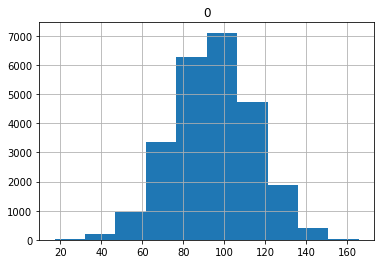

In [35]:
pd.DataFrame(predicted_valid_3).hist()

### Выводы по обучению моделей
<a class="anchor" id="chapter2.4"></a>

In [36]:
print('Название датасета |  rmse  |   r2   | Средний запас предсказанного сырья |')
print('----------------------------------------------------------------')
print('df1             {: <8.4f} {: <8.3f} {: 15.2f} '.format(r2_1, rmse_1, predicted_mean_1))
print('df2             {: <8.4f} {: <8.3f} {: 15.2f}'.format(r2_2, rmse_2, predicted_mean_2))
print('df3             {: <8.4f} {: <8.3f} {: 15.2f}'.format(r2_3, rmse_3, predicted_mean_3))

Название датасета |  rmse  |   r2   | Средний запас предсказанного сырья |
----------------------------------------------------------------
df1             0.2799   37.579             92.59 
df2             0.9996   0.893              68.73
df3             0.2052   40.030             94.97


Мы видим что лучше всего модель обучилась по 2-му датасету и там самое низкое отклонение, но там меньше всего средняя по предсказанному запасу сырья и распределение не нормальное.

# 3. Подготовка к расчёту прибыли
<a class="anchor" id="chapter3"></a>

In [37]:
n = 500 # выборка скважин
m = 200 # количество скважин для разработки
barrel_price = 450000 # стоимость 1 барреля
budget = 10000000000 # наш бюджет

In [38]:
min_barrels = budget/(barrel_price*m)
min_barrels

111.11111111111111

Мы видим, что минимальное количество 111,1 барелей в каждой скважине нужно для безубыточной добычи, а у нас средние по скважинам 68,92,95 , что говорит о возможности прибыльной разработки любых месторождений.

In [39]:
def revenue(target, predicted, count):
    probs_best = pd.Series(predicted).sort_values(ascending=False) # сортируем предикты
    income = (target[probs_best.index][:count].sum() * barrel_price).round(0) # находим доход = сумма топовых * прайс
    margine = income - budget # находим прибыль
    return margine

Мы задали переменные и прописали функцию для расчета прибыли

# 4. Расчёт прибыли и рисков 
<a class="anchor" id="chapter4"></a>

Посчитаем для 1 региона

Средняя выручка: 425938526.927
97,5%-квантиль по выручке: 947976353.5749999
2,5%-квантиль по выручке: -102090094.925
Вероятность убытков: 6.0 %
CPU times: user 5.59 s, sys: 74 ms, total: 5.66 s
Wall time: 5.83 s


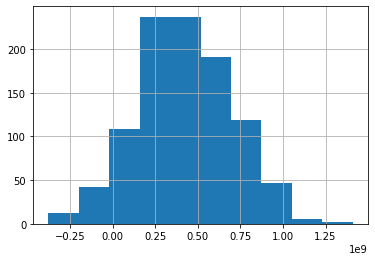

In [40]:
%%time
state = np.random.RandomState(12345)
values = []

# Bootstrap с тысячей самплов
for i in range(1000):
    target_subsample = target_valid_1.reset_index(drop=True).sample(n=n, replace=True, random_state=state) # создаем 1 рандомный сампл с n значений
    probs_subsample = pd.Series(predicted_valid_1)[target_subsample.index] # собираем цели которые предсказала модель для сампла
    values.append(revenue(target_subsample, probs_subsample, m)) # применяем функциюподсчета прибыли для сампла

values_1 = pd.Series(values)

# находим 95% доверительный интервал и среднюю
lower_1 = values_1.quantile(0.025) 
upper_1 = values_1.quantile(0.975) 
mean_1 = values_1.mean() 

# Найдем процент убытков в нашей выручке
outcome_risk_1 = len(values_1[values_1 < 0])/len(values_1)*100

print("Средняя выручка:", mean_1)
print("97,5%-квантиль по выручке:", upper_1)
print("2,5%-квантиль по выручке:", lower_1)
print("Вероятность убытков:",outcome_risk_1,"%")
values_1.hist()

 Мы видим что вся прибыль колеблеться с 6,25 млрд до 8,25 млр руб, убыточных мест нету, соответственно вероятность убытка 0%. средняя выручка 7,27 млрд руб.

Проверим для 2 региона

Средняя выручка: 515222773.437
97,5%-квантиль по выручке: 931547590.8749999
2,5%-квантиль по выручке: 68873225.10000001
Вероятность убытков: 1.0 %
CPU times: user 5.27 s, sys: 49.5 ms, total: 5.32 s
Wall time: 5.38 s


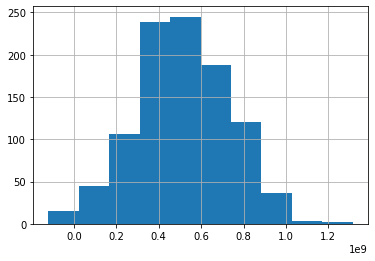

In [41]:
%%time
state = np.random.RandomState(12345)
values = []

# Bootstrap с тысячей самплов
for i in range(1000):
    target_subsample = target_valid_2.reset_index(drop=True).sample(n=n, replace=True, random_state=state) # создаем 1 рандомный сампл с n значений
    probs_subsample = pd.Series(predicted_valid_2)[target_subsample.index] # собираем цели которые предсказала модель для сампла
    values.append(revenue(target_subsample, probs_subsample, m)) # применяем функциюподсчета прибыли для сампла

values_2 = pd.Series(values)

# находим 95% доверительный интервал и среднюю
lower_2 = values_2.quantile(0.025) 
upper_2 = values_2.quantile(0.975) 
mean_2 = values_2.mean() 

# Найдем процент убытков в нашей выручке
outcome_risk_2 = len(values_2[values_2 < 0])/len(values_2)*100

print("Средняя выручка:", mean_2)
print("97,5%-квантиль по выручке:", upper_2)
print("2,5%-квантиль по выручке:", lower_2)
print("Вероятность убытков:",outcome_risk_2,"%")
values_2.hist()

Проверим для 3 региона

Средняя выручка: 435008362.791
97,5% квантиль по выручке: 969706953.725
2,5% квантиль по выручке: -128880547.35
Вероятность убытков: 6.4 %
CPU times: user 5.17 s, sys: 40 ms, total: 5.21 s
Wall time: 5.24 s


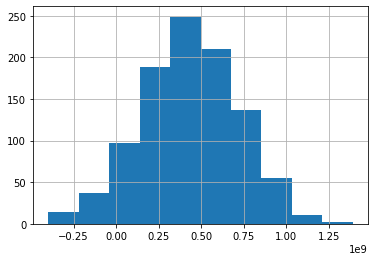

In [42]:
%%time
state = np.random.RandomState(12345)
values = []

# Bootstrap с тысячей самплов
for i in range(1000):
    target_subsample = target_valid_3.reset_index(drop=True).sample(n=n, replace=True, random_state=state) # создаем 1 рандомный сампл с n значений
    probs_subsample = pd.Series(predicted_valid_3)[target_subsample.index] # собираем цели которые предсказала модель для сампла
    values.append(revenue(target_subsample, probs_subsample, m)) # применяем функциюподсчета прибыли для сампла

values_3 = pd.Series(values) 

# находим 95% доверительный интервал и среднюю
lower_3 = values_3.quantile(0.025) 
upper_3 = values_3.quantile(0.975) 
mean_3 = values_3.mean() 

# Найдем процент убытков в нашей выручке
outcome_risk_3 = len(values_3[values_3 < 0])/len(values_3)*100

print("Средняя выручка:", mean_3)
print("97,5% квантиль по выручке:", upper_3)
print("2,5% квантиль по выручке:", lower_3)
print("Вероятность убытков:",outcome_risk_3,"%")
values_3.hist()

## Вывод по моделям и регионам

Соберем итоговую таблицу по данным и примем решение

In [48]:
print('Название датасета |  rmse  |   r2   | Ср. запас сырья |  Средняя выручка |  2,5% квантиль | 97,5% квантиль | Вероятность убытков %')
print('--------------------------------------------------------------------------------------------------------------------')
print('df1                {: <8.4f} {: <8.3f}  {: 8.2f}         {: <8.0f}        {: 8.0f}         {: 8.0f}        {: 8.2f}'.format(r2_1, rmse_1, predicted_mean_1, mean_1, lower_1, upper_1, outcome_risk_1))
print('df2                {: <8.4f} {: <8.3f}  {: 8.2f}         {: <8.0f}        {: 8.0f}         {: 8.0f}        {: 8.2f}'.format(r2_2, rmse_2, predicted_mean_2, mean_2, lower_2, upper_2, outcome_risk_2))
print('df3                {: <8.4f} {: <8.3f}  {: 8.2f}         {: <8.0f}        {: 8.0f}         {: 8.0f}        {: 8.2f}'.format(r2_3, rmse_3, predicted_mean_3, mean_3, lower_3, upper_3, outcome_risk_3))

Название датасета |  rmse  |   r2   | Ср. запас сырья |  Средняя выручка |  2,5% квантиль | 97,5% квантиль | Вероятность убытков %
--------------------------------------------------------------------------------------------------------------------
df1                0.2799   37.579       92.59         425938527        -102090095          947976354            6.00
df2                0.9996   0.893        68.73         515222773         68873225          931547591            1.00
df3                0.2052   40.030       94.97         435008363        -128880547          969706954            6.40


 Исходя из результатов мы видим:
- Самая хорошая модель получилась по датасету 2-го региона, r2=0.89 и rmse = 0.99.
- У 2-го региона целевая переменная имеет не нормальное распределение, что выделяется среди остальных регионов. 
- Средняя вырочка самая высокая во 2-м регионе.
- Вероятность убытков самая низкая во 2-м регионе, он единственный имеет 2,5% квартиль плюсовую, что соответствуею условиям задачи.
<br>

Исходя из наших выводов очевидно - самый выгодный 2 регион, рекомендуем его к разработке.